In [1]:
import requests
from bs4 import BeautifulSoup

BASE = "https://bigbangtrans.wordpress.com"
series_archive = f"{BASE}/series-index/"

resp = requests.get(series_archive, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(resp.content, "html.parser")

episode_links = [
    a["href"]
    for a in soup.select("a[href*='/series-']")  # resembles /series-1-episode-1-...
    if a["href"].startswith(BASE)
]

episode_links = sorted(set(episode_links))
print(f"✅ Found {len(episode_links)} episode links")
episode_links[:5]

✅ Found 231 episode links


['https://bigbangtrans.wordpress.com/series-06-episode-23-the-love-spell-potential/',
 'https://bigbangtrans.wordpress.com/series-06-episode-24-the-bon-voyage-reaction/',
 'https://bigbangtrans.wordpress.com/series-1-episode-08-the-lizard-spock-expansion/',
 'https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/',
 'https://bigbangtrans.wordpress.com/series-1-episode-10-the-loobenfeld-decay/']

In [2]:
import re
import json
import time

sheldon_lines = []
headers = {"User-Agent": "Mozilla/5.0"}

for idx, ep_url in enumerate(episode_links, start=1):
    print(f"📺 Episode {idx}/{len(episode_links)}: {ep_url}")
    r = requests.get(ep_url, headers=headers)
    soup = BeautifulSoup(r.content, "html.parser")
    
    # WordPress posts use <p> tags for dialogue
    for p in soup.find_all("p"):
        text = p.get_text(strip=True)
        if text.lower().startswith("sheldon:"):
            content = re.sub(r"^sheldon:\s*", "", text, flags=re.IGNORECASE)
            sheldon_lines.append({
                "episode": idx,
                "url": ep_url,
                "line": content
            })
    
    time.sleep(1)  # be nice to the server

print(f"✅ Extracted {len(sheldon_lines)} Sheldon lines")

📺 Episode 1/231: https://bigbangtrans.wordpress.com/series-06-episode-23-the-love-spell-potential/
📺 Episode 2/231: https://bigbangtrans.wordpress.com/series-06-episode-24-the-bon-voyage-reaction/
📺 Episode 3/231: https://bigbangtrans.wordpress.com/series-1-episode-08-the-lizard-spock-expansion/
📺 Episode 4/231: https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/
📺 Episode 5/231: https://bigbangtrans.wordpress.com/series-1-episode-10-the-loobenfeld-decay/
📺 Episode 6/231: https://bigbangtrans.wordpress.com/series-1-episode-11-the-pancake-batter-anomaly/
📺 Episode 7/231: https://bigbangtrans.wordpress.com/series-1-episode-12-the-jerusalem-duality/
📺 Episode 8/231: https://bigbangtrans.wordpress.com/series-1-episode-13-the-bat-jar-conjecture/
📺 Episode 9/231: https://bigbangtrans.wordpress.com/series-1-episode-14-the-nerdvana-annihilation/
📺 Episode 10/231: https://bigbangtrans.wordpress.com/series-1-episode-15-the-porkchop-indeterminacy/
📺 Episode 11/231: https://bigban

In [3]:
# Save training format
with open("sheldon_dialogue.txt", "w", encoding="utf-8") as f:
    for item in sheldon_lines:
        f.write(f"<|sheldon|> {item['line']} <|end|>\n")

# Save raw structured version for reference
with open("sheldon_dialogue.json", "w", encoding="utf-8") as f:
    json.dump(sheldon_lines, f, indent=2)

print("✅ Saved as 'sheldon_dialogue.txt' and 'sheldon_dialogue.json'")

✅ Saved as 'sheldon_dialogue.txt' and 'sheldon_dialogue.json'


In [1]:
import random

# Load the .txt file
file_path = "sheldon_dialogue.txt"

with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Strip and clean
lines = [line.strip() for line in lines if line.strip()]

# Preview
print(f"✅ Total Sheldon lines: {len(lines)}\n")
print("📄 Sample lines:\n")
for line in random.sample(lines, 5):
    print(line)

# Check formatting
bad_format = [line for line in lines if not (line.startswith("<|sheldon|>") and line.endswith("<|end|>"))]

print(f"\n🔍 Formatting issues found: {len(bad_format)}")
if bad_format:
    print("❗ Example bad line:", bad_format[0])

✅ Total Sheldon lines: 11410

📄 Sample lines:

<|sheldon|> Chair. <|end|>
<|sheldon|> No, I’m just allergic to people who get Nobel Prizes for no good reason. <|end|>
<|sheldon|> We’re not flying, we’re taking the train. <|end|>
<|sheldon|> Some genius. I zinged him with sarcasm, he didn’t even notice. <|end|>
<|sheldon|> Forgive me, Penny, but that would be the very definition of a frivolous lawsuit. <|end|>

🔍 Formatting issues found: 0


In [2]:
import tiktoken

# Choose the tokenizer for your target model
encoding = tiktoken.encoding_for_model("gpt2")  # or "gpt-4o", "gpt-neo", etc.

token_counts = [len(encoding.encode(line)) for line in lines]
total_tokens = sum(token_counts)
avg_tokens = total_tokens / len(token_counts)

print(f"🔢 Total tokens: {total_tokens:,}")
print(f"📏 Average tokens per line: {avg_tokens:.2f}")
print(f"📈 Max tokens in a line: {max(token_counts)}")
print(f"📉 Min tokens in a line: {min(token_counts)}")

🔢 Total tokens: 372,344
📏 Average tokens per line: 32.63
📈 Max tokens in a line: 292
📉 Min tokens in a line: 13


# SheldonGPT V2

In [3]:
# first lets load our txt data
# Load the .txt file
file_path = "sheldon_dialogue.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

print(text)

<|sheldon|> Dungeons & Dragons. <|end|>
<|sheldon|> I’ve got a brand-new seven piece set of polyhedral dice. Hello, new dice smell. <|end|>
<|sheldon|> Yeah, yeah, we’ll be right there. Leonard? <|end|>
<|sheldon|> I’m not sure how I feel about Howard being dungeon master instead of you. <|end|>
<|sheldon|> Oh, please. Every time the topic of change comes up, you throw Zachary Quinto in my face. I’m upset the mailman has a new haircut, Zachary Quinto. I’m upset that daylight saving time started, Zachary Quinto. I’m upset daylight saving time ended, Zachary Quinto. I’m saying this for the last time, Zachary Quinto was a weird, wonderful, unrepeatable event. So stop using him against me. <|end|>
<|sheldon|> As good? You just got pantsed in the schoolyard, four-eyes. <|end|>
<|sheldon|> Go on, give him your lunch money. <|end|>
<|sheldon|> He does sound effects, too! <|end|>
<|sheldon|> Okay, well, I have a sound effect for those sound effects.(Blows raspberry) <|end|>
<|sheldon|> Ah, tha

In [4]:
import tiktoken
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class SheldonDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special = {"<|end|>", "<|sheldon|>"})

        # using a sliding window approach to  chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i +1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk)) # i was appending both input_chunk and target_chunk to self.input_ids by mistake.
            
    def __len__(self):
        return len(self.input_ids)
        
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader(txt, batch_size=4, max_length=256, stride=128, shuffle=True):
    # initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")
    
    # create dataset
    dataset = SheldonDatasetV1(txt, tokenizer, max_length, stride)

    # create dataloader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader
    

In [5]:
import torch
import tiktoken
import torch.nn as nn



# Add allowed special tokens
allowed_special = {"<|end|>", "<|sheldon|>"}

# Read the file correctly
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()  # ✅ use .read(), NOT .readlines()

tokenizer = tokenizer = tiktoken.get_encoding("gpt2")
encoded_text = tokenizer.encode(text, allowed_special = {"<|endoftext|>", "<|persona|>"})

vocab_size = 50257
output_dim = 256 # output_dim = 768
max_len = 1024
context_length = max_len # context_length = 1024 for production grade

token_embedding_layer = nn.Embedding(vocab_size, output_dim)
pos_embedding_layer = torch.nn.Embedding(context_length,output_dim)

max_length = 128
dataloader = create_dataloader(text, batch_size=8, max_length=max_length, stride=max_length)


In [6]:
for batch in dataloader:
    x, y = batch  # This should now work!
    
    token_embeddings = token_embedding_layer(x)  # (B, T, D)
    
    pos_ids = torch.arange(x.shape[1])  # (T,)
    pos_embeddings = pos_embedding_layer(pos_ids).unsqueeze(0)  # (1, T, D)
    
    input_embeddings = token_embeddings + pos_embeddings  # (B, T, D)
    break

print(input_embeddings.shape)

torch.Size([8, 128, 256])


## Transformer Block

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout=0.1, num_heads=8, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_q = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_k = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_v = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)

        # Causal mask: upper triangle of ones, zero on and below diagonal
        mask = torch.tril(torch.ones(context_length, context_length)).unsqueeze(0).unsqueeze(0)
        self.register_buffer("mask", mask)

    def forward(self, x):
        B, T, _ = x.shape  # (batch, seq_len, d_in)
        
        # Project input to Q, K, V
        q = self.W_q(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)  # (B, heads, T, dim)
        k = self.W_k(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.W_v(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)

        # Scaled dot-product attention
        scores = q @ k.transpose(-2, -1) / (self.head_dim ** 0.5)  # (B, heads, T, T)
        scores = scores.masked_fill(self.mask[:, :, :T, :T] == 0, float('-inf'))  # causal mask

        attn = F.softmax(scores, dim=-1)
        attn = self.dropout(attn)

        out = attn @ v  # (B, heads, T, dim)
        out = out.transpose(1, 2).contiguous().view(B, T, self.d_out)  # (B, T, d_out)

        return self.out_proj(out)

I will now implement a Layer norm class

In [8]:
import torch
import torch.nn as nn

class LayerNorm(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.bias = nn.Parameter(torch.zeros(emb_dim))  # a.k.a. shift in some papers

    def forward(self, x):
        # x shape: [batch_size, seq_len, emb_dim]
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, unbiased=False, keepdim=True)
        x_norm = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * x_norm + self.bias

Time to implement a feed forward with GELU Activations

In [9]:
import torch
import torch.nn as nn
import math

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            math.sqrt(2 / math.pi) * (x + 0.044715 * x.pow(3))
        ))

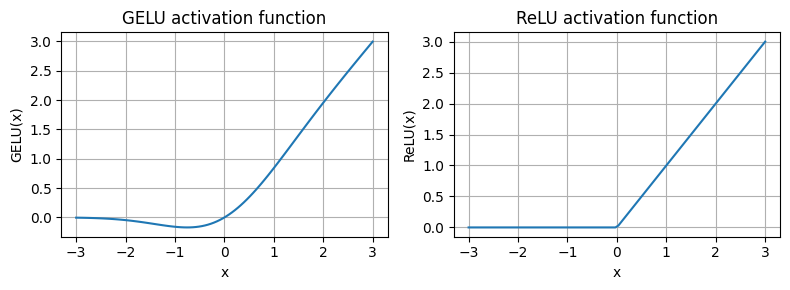

In [10]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

now time to implement the small neural network module, FeedFowrward that will be used in the LLMs transformer block later

In [11]:
import torch.nn as nn

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        emb_dim = cfg["emb_dim"]
        dropout = cfg.get("dropout", 0.1)

        self.layers = nn.Sequential(
            nn.Linear(emb_dim, 4 * emb_dim),   # Expansion
            GELU(),                            # Non-linearity (approximate)
            nn.Dropout(dropout),
            nn.Linear(4 * emb_dim, emb_dim),   # Projection back
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

In [12]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [13]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

In [14]:
torch.manual_seed(123)

x = torch.rand(2, 4, 768)  # Shape: [batch_size, num_tokens, emb_dim]
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


# SheldonGPT

In [15]:
class sheldonGPT(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape

        tok_embeds = self.tok_emb(in_idx)  # [B, T, C]
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))  # [T, C]
        pos_embeds = pos_embeds.unsqueeze(0).expand(batch_size, -1, -1)  # [B, T, C]

        x = tok_embeds + pos_embeds  # [B, T, C]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)  # [B, T, vocab_size]

        return logits

In [16]:
torch.manual_seed(123)
input_ids, target_ids = batch  # Unpack the tuple properly

model = sheldonGPT(GPT_CONFIG_124M)
out = model(input_ids)  # Only pass input_ids to the model

print("Input batch:\n", input_ids)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[   13,  1279,    91,  ..., 19179,   287, 12644],
        [ 7091, 25900,    91,  ..., 25965,    11,   345],
        [ 1141,  9965,   319,  ...,    11,   314,   447],
        ...,
        [  198,    27,    91,  ...,  8224, 19786,   502],
        [  422,   514,    13,  ...,    76,  7926,    11],
        [  286,  3128, 12513,  ...,    11,   475,   314]])

Output shape: torch.Size([8, 128, 50257])
tensor([[[-0.0674, -0.8110,  0.5150,  ..., -0.1094,  0.4244, -0.5849],
         [ 0.5450, -0.5653,  0.3431,  ..., -0.2765,  0.2507, -0.2920],
         [ 1.0113, -0.5936,  0.3817,  ...,  0.3141,  0.2227,  0.1357],
         ...,
         [-0.3842,  0.6682, -0.9090,  ...,  0.0289,  0.1713, -0.4635],
         [-0.6548,  0.4284,  0.0021,  ...,  0.1689,  0.2595,  0.3347],
         [-0.0787, -0.3531, -0.8112,  ..., -0.2170, -0.0489, -0.8005]],

        [[-0.4132,  0.0770, -0.2120,  ...,  0.1703, -0.2149, -0.5612],
         [ 0.7779, -0.1539,  0.4114,  ..., -0.4293, -0.8330, -0.1915

In [17]:
# Create your DataLoader
dataloader = create_dataloader(text, batch_size=2, max_length=256)

# Instantiate model
torch.manual_seed(123)
model = sheldonGPT(GPT_CONFIG_124M)

# Check shapes
for batch in dataloader:
    x, y = batch  # x = input_ids, y = target_ids
    logits = model(x)  # Shape: (batch_size, seq_len, vocab_size)

    print("Input shape:", x.shape)
    print("Target shape:", y.shape)
    print("Logits shape:", logits.shape)
    break

Input shape: torch.Size([2, 256])
Target shape: torch.Size([2, 256])
Logits shape: torch.Size([2, 256, 50257])


In [18]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [19]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [20]:
total_params_gpt2 =  total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [21]:
# Calculate the total size in bytes (assuming float32, 4 bytes per parameter)
total_size_bytes = total_params * 4

# Convert to megabytes
total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## Generating Text before training

In [22]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):
        
        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]
        
        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)
        
        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]  

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In [23]:
start_context = "My name is Sheldon "

encoded = tokenizer.encode(start_context)
print("encoded:", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [3666, 1438, 318, 34536, 220]
encoded_tensor.shape: torch.Size([1, 5])


In [24]:
model.eval() # disable dropout

out = generate_text_simple(
    model=model,
    idx=encoded_tensor, 
    max_new_tokens=6, 
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[ 3666,  1438,   318, 34536,   220, 24086, 47843, 30961, 42348,  7267,
         49706]])
Output length: 11


In [25]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

My name is Sheldon iman Byeswickattribute argue logger


# TRAINING THE LLM

In [26]:
print(model)

sheldonGPT(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_q): Linear(in_features=768, out_features=768, bias=False)
        (W_k): Linear(in_features=768, out_features=768, bias=False)
        (W_v): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): Trans

In [27]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special = {"<|endoftext|>", "<|persona|>"})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "My name is"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 My name is berries951 Skydragon://IRTAsset Ambassador Rai GAMhak


In [28]:

# Alternatively:
# from llms_from_scratch.ch02 import create_dataloader_v1

# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text))
train_data = text[:split_idx]
val_data = text[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    shuffle=True,
)

val_loader = create_dataloader(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    shuffle=False,
)

In [29]:
# check if the data was loaded correctly
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 102

In [30]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)


Training tokens: 344064
Validation tokens: 38912
All tokens: 382976


- Next we can implement a utility fuction to calculate cross-entropy loss of a given batch

In [31]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

- Time to Train

In [33]:
import os
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

# --- Checkpoint config ---
checkpoint_path = "sheldon_checkpoint.pt"
num_epochs = 10
resume_training = os.path.exists(checkpoint_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Seed & model ---
torch.manual_seed(123)
model = sheldonGPT(GPT_CONFIG_124M).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)
steps_per_epoch = len(train_loader)
total_steps = steps_per_epoch * num_epochs
scheduler = CosineAnnealingLR(optimizer, T_max=total_steps)

# --- Load checkpoint if available ---
start_epoch = 0
start_step = 0
if resume_training:
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint["model_state"])
    optimizer.load_state_dict(checkpoint["optimizer_state"])
    scheduler.load_state_dict(checkpoint["scheduler_state"])
    start_epoch = checkpoint["epoch"]
    start_step = checkpoint.get("step", 0)
    print(f"✅ Resumed from checkpoint — Epoch {start_epoch}, Step {start_step}")

# --- Training wrapper ---
def train_model_simple_resume(
    model, train_loader, val_loader, optimizer, device,
    num_epochs, eval_freq, eval_iter, start_context, tokenizer, scheduler
):
    train_losses, val_losses, tokens_seen = [], [], 0
    model.train()

    step = start_step
    for epoch in range(start_epoch, num_epochs):
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), y.view(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            step += 1
            tokens_seen += x.numel()
            train_losses.append(loss.item())

            if step % eval_freq == 0:
                model.eval()
                val_loss = 0
                with torch.no_grad():
                    for i, (x_val, y_val) in enumerate(val_loader):
                        if i >= eval_iter: break
                        x_val, y_val = x_val.to(device), y_val.to(device)
                        logits_val = model(x_val)
                        loss_val = torch.nn.functional.cross_entropy(logits_val.view(-1, logits_val.size(-1)), y_val.view(-1))
                        val_loss += loss_val.item()
                val_loss /= eval_iter
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {step:06d}): Train loss {loss.item():.3f}, Val loss {val_loss:.3f}")
                model.train()

            if step % 100 == 0:
                torch.save({
                    "model_state": model.state_dict(),
                    "optimizer_state": optimizer.state_dict(),
                    "scheduler_state": scheduler.state_dict(),
                    "epoch": epoch,
                    "step": step,  # ✅ Save step too
                }, checkpoint_path)

    return train_losses, val_losses, tokens_seen


def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss


def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

✅ Resumed from checkpoint — Epoch 3


In [34]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

# Optional: Time tracking
import time
start_time = time.time()

torch.manual_seed(123)
model = sheldonGPT(GPT_CONFIG_124M)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

# Set up LR scheduler
steps_per_epoch = len(train_loader)
total_steps = steps_per_epoch * 10  # 10 = num_epochs
scheduler = CosineAnnealingLR(optimizer, T_max=total_steps)

num_epochs = 10
# --- Run training ---
train_losses, val_losses, tokens_seen = train_model_simple_resume(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="My name is", tokenizer=tokenizer,
    scheduler=scheduler
)

# --- Time log ---
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"✅ Training completed in {execution_time_minutes:.2f} minutes.")

Ep 4 (Step 000005): Train loss 6.327, Val loss 5.599
Ep 4 (Step 000010): Train loss 4.980, Val loss 4.669
Ep 4 (Step 000015): Train loss 4.986, Val loss 4.232
Ep 4 (Step 000020): Train loss 4.001, Val loss 4.090
Ep 4 (Step 000025): Train loss 3.903, Val loss 4.002
Ep 4 (Step 000030): Train loss 4.134, Val loss 3.939
Ep 4 (Step 000035): Train loss 4.292, Val loss 3.897
Ep 4 (Step 000040): Train loss 3.879, Val loss 3.855
Ep 4 (Step 000045): Train loss 3.762, Val loss 3.827
Ep 4 (Step 000050): Train loss 4.105, Val loss 3.804
Ep 4 (Step 000055): Train loss 3.832, Val loss 3.781
Ep 4 (Step 000060): Train loss 4.128, Val loss 3.738
Ep 4 (Step 000065): Train loss 3.613, Val loss 3.725
Ep 4 (Step 000070): Train loss 3.438, Val loss 3.717
Ep 4 (Step 000075): Train loss 4.039, Val loss 3.712
Ep 4 (Step 000080): Train loss 3.606, Val loss 3.674
Ep 4 (Step 000085): Train loss 3.480, Val loss 3.663
Ep 4 (Step 000090): Train loss 4.463, Val loss 3.679
Ep 4 (Step 000095): Train loss 4.189, Val loss

In [35]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [51]:
torch.manual_seed(123)

prompt = "You can't "
input_ids = text_to_token_ids(prompt, tokenizer).to(device)

generated_ids = generate(
    model=model,
    idx=input_ids,
    max_new_tokens=50,  # more tokens lets the model stretch its legs
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,           # more variety while still controlled
    temperature=1.2     # a bit more creativity
)

output = token_ids_to_text(generated_ids, tokenizer)
print("🧠 Output:\n", output.replace("\n", " "))

🧠 Output:
 You can't  Leonard. <|end|> <|sheldon|> How come to have some reason to work for an alien, it’s a dead me, why don’t like a little more. He didn’t want


What’s Actually Going On?

You’re training a GPT-2 124M scale model — about 12 layers, 768 hidden size — on a ~380k token dataset, for 10 epochs.

That means:

	•	The model is starting to imitate the tone and rhythm of Sheldon
	•	But lacks the semantic grounding to say anything truly meaningful or consistent
	•	It can “sound” like Sheldon without actually thinking like Sheldon

This is classic small-model behavior on low-data:

	•	Surface mimicry
	•	Hallucinated logic
	•	Token-level guessing instead of real understanding
